In [10]:
%pylab inline

import vaex
import matplotlib.pyplot as plt
from astropy import coordinates as coord
from astropy import units as u
from orbit_util import sample_orbits ## Where the actual orbit integration is defined



## Somer personal preferences
%config InlineBackend.figure_format = 'png'
font = {"family": "Asap Condensed", "weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 2  # set the value globally
plt.rc("font", **font)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

k = 4.7404705
vlsr = 232.8
x_gc_sun = -8.2 # kpc
sunpos = numpy.array([-8.2, 0.0, 0.014 ])      # kpc #xsun=-8.2kpc where [x,y,z]_GC=[0,0,0]
sunvel = numpy.array([11.1, vlsr+12.24, 7.25]) # U(inward), V(along y), W(upward))    
coord.galactocentric_frame_defaults.set('v4.0');

In [20]:
from gala import __version__ as _gala_version
from astropy import __version__ as _astropy_version

print(np.__version__, _astropy_version, _gala_version,  vaex.__version__)

1.20.2 4.3.1 1.4.1 {'vaex-core': '4.1.0', 'vaex-viz': '0.5.0', 'vaex-hdf5': '0.7.0', 'vaex-server': '0.4.0', 'vaex-astro': '0.8.0', 'vaex-jupyter': '0.6.0', 'vaex-ml': '0.11.1'}


## Read observed sky position, proper motion, distance and radial velocity 

https://people.smp.uq.edu.au/HolgerBaumgardt/globular/orbits.html

In [4]:
cooGC = vaex.open('BaumgardtHilker_MWGC.hdf5')

## Integrate orbits

For all clusters, sampling from 100 realizations of the initial conditions and with output every 3 Myr and 1000 outputs this will require about 85Gb or RAM and produce a 2.5 Gb hdf5 file

In [8]:
## Uncomment below to integrate (CAUTION)
#odf, samples = sample_orbits(cooGC, dt=3, n_steps=1000, nsamp=100, num_cores=62) ## This uses a LOT of memory, careful  when rerunning it
#odf.export_hdf5('../mwgc_orbits.hdf5', progress=True)
#samples.export_hdf5('../mwgc_samples.hdf5', progress=True)

## OR set nsamp=1 for a single sample each cluster
#odf, samples = sample_orbits(cooGC, dt=3, n_steps=1000, nsamp=1, num_cores=62) ## This uses a LOT of memory, careful  when rerunning it

## OR Read pre-computed files (provided on request)
odf = vaex.open('../mwgc_orbits.hdf5')
samples = vaex.open('../mwgc_samples.hdf5')

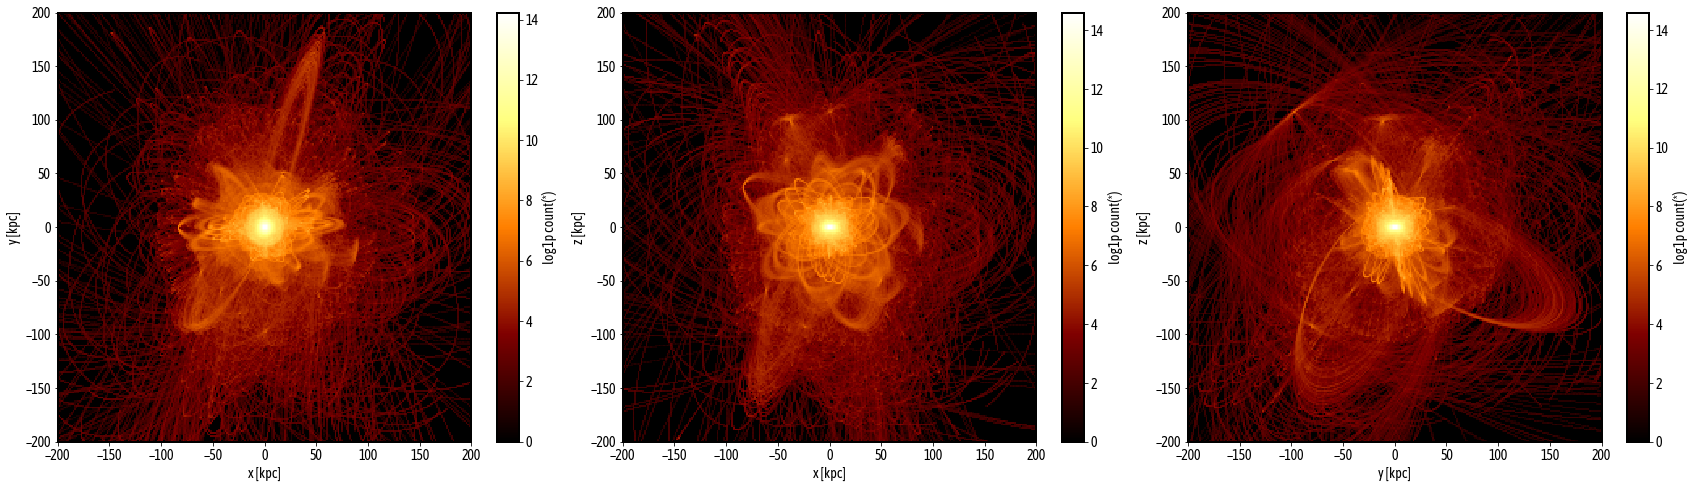

In [21]:
## Plotting it because it looks pretty
figure(figsize=(24,7))
subplot(131)
odf.plot('x', 'y', f='log1p', limits=[[-200, 200], [-200,200]])
xlabel('x [kpc]')
ylabel('y [kpc]')

subplot(132)
odf.plot('x', 'z', f='log1p', limits=[[-200, 200], [-200,200]])
xlabel('x [kpc]')
ylabel('z [kpc]')

subplot(133)
odf.plot('y', 'z', f='log1p', limits=[[-200, 200], [-200,200]])
xlabel('y [kpc]')
ylabel('z [kpc]')

savefig('GC_orbits.png', bbox_inches='tight', dpi=90)